<a href="https://colab.research.google.com/github/cybermin/2022_BSSM/blob/main/05_codelab2_urllib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


일별 박스오피스 API 서비스를 이용하여 2020년12월1일~31일 일별박스 오피스 자료를 분석하시오.

+ https://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do
---

In [1]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

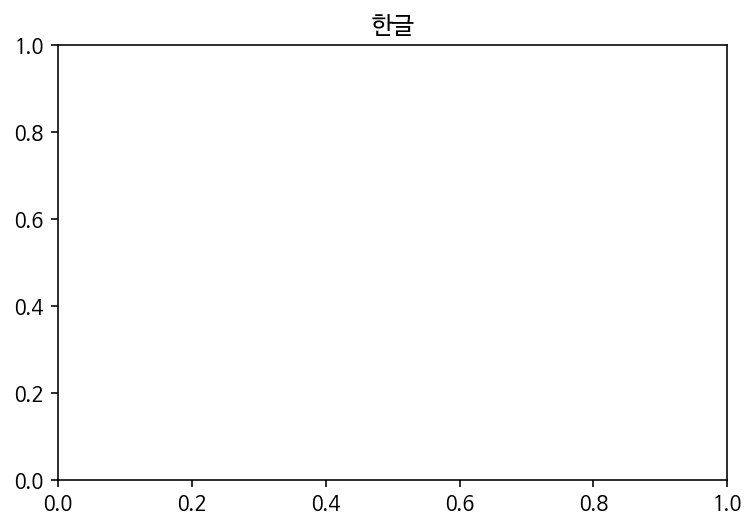

In [3]:
plt.title('한글')
plt.show()

#urllib 모듈
+ URL과 웹 요청에 관련된 모듈들 패키지로 묶어 제공

## urllib.request 모듈
* 웹 페이지 요청 및 데이터를 가져올 수 있음

### urllib.request.urlopen(url, data)
* 웹 서버에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘**응답 객체(HTTPResponse)**’를 반환
* data는 서버로 전송할 추가 데이터를 지정하는 객체
* 반환된 응답 객체:  read() 메서드를 실행
   - 웹 서버가 응답한 데이터를 바이트 배열로 읽어들임
   - 읽어들인 바이트 배열 : 이진수로 이루어진 수열이어서 **텍스트 형식의 데이터를 decode('utf-8') 메서드를 실행하여 문자열로 변환**

* 참고) **Byte 데이터**
  + 1바이트(0~255사이 코드)로 표현되는 문자 표현
  + 문자열에서 사용하는 연산을 거의 제공
    - 인덱싱/슬라이싱, in, Upper(), Split()
  + 지원 메소드
    - **decode(인코딩값)** : 바이트->문자열로 변환  
    - **encode()** : 문자열->바이트로 변환  


### urllib.request.Request(url, headers={})
* POST방식으로 데이터를 보내려고 할 경우 
  + URL : 요청 주소
  * headers : 딕셔너리형태의 헤더

+ 2021년 12월 1일에서 31일까지 일일박스오프자료를 추출해서 CSV저장

In [ ]:
from urllib.request import Request, urlopen
import json  

In [ ]:
url = 'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20220103'

In [ ]:
rsp = urlopen(url).read().decode('utf-8')
rsp

In [ ]:
#json형태의 문자열 dict형태로 변경
mvdt = json.loads(rsp)
type(mvdt)

dict

In [ ]:
mvlt = mvdt['boxOfficeResult']['dailyBoxOfficeList']
type(mvlt)

list

In [ ]:
for item in mvlt:
  d = mvdt['boxOfficeResult']["showRange"][:4] + '-' + mvdt['boxOfficeResult']["showRange"][4:6] +'-'+ mvdt['boxOfficeResult']["showRange"][6:8]
  print( d, item["rank"], item['movieNm'], item['audiCnt'] , item['audiAcc'])

2022-01-03 1 스파이더맨: 노 웨이 홈 66799 6141100
2022-01-03 2 킹스맨: 퍼스트 에이전트 23748 800139
2022-01-03 3 해피 뉴 이어 10181 196396
2022-01-03 4 매트릭스: 리저렉션 1843 204748
2022-01-03 5 드라이브 마이 카 1105 23696
2022-01-03 6 신데렐라 2: 마법에 걸린 왕자 1022 36771
2022-01-03 7 엔칸토: 마법의 세계 897 627528
2022-01-03 8 램 533 11058
2022-01-03 9 괴짜들의 로맨스 350 8101
2022-01-03 10 씽2게더 267 557


---

# **해결문제**


일별 박스오피스 API 서비스를 이용하여 2020년12월1일~31일 일별박스 오피스 자료를 분석하시오.

+ https://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
list(range(1,32))

In [8]:
#파이썬 반복문 
for i  in range(1,32) :
  print(i, end=' ')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [9]:
#1~31까지 숫자를 2자리 문자열로 만들기 
for i  in range(1,32) :
  if i < 10 : n = '0' + str(i)
  else : n = str(i)

  print(n, end=' ')

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [11]:
#1~31까지 숫자를 2자리 문자열로 만들기 : 파이썬 포멧
for i  in range(1,32) :
  #n = '{:02d}'.format(i)
  n = f'{i:02d}'

  print(n, end=' ')

01 02 03 04 05 06 07 08 09 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 

In [18]:
from urllib.request import Request, urlopen
import json 

In [34]:
#함수 
def mvApi(n) :
  #url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=202112' + n
  url =  'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?'
  url = url + 'key=' + 'f5eef3421c602c6cb7ea224104795888'
  url = url + '&targetDt=202112' + n

  #웹상에서 제공되는 json형태의 자료가져오기
  resp = urlopen(url).read().decode('utf-8')

  #파이썬의 딕션너리 형태로 변형 
  mvdt = json.loads(resp)

  #딕션너리에서 자료 가져오기
  boxOfficeResult = mvdt['boxOfficeResult']

  #일자 만들기
  showRange = boxOfficeResult['showRange']
  day = showRange[:4] + '-' + showRange[4:6] + '-' + showRange[6:8]

  #박스오피스 영화
  dailyBoxOfficeList = boxOfficeResult['dailyBoxOfficeList']

  lines = ''
  for item in dailyBoxOfficeList :
    lines = lines + f"{day},{item['rank']},{item['movieNm']},{item['audiCnt']},{item['audiAcc']}\n"


  return lines

In [ ]:
#csv 파일 만들기 
with open('/content/drive/MyDrive/BSSM/BSSM2022/data/mv.csv', 'w') as fp :
  fp.write('일자,순위,영화명,일관객수,누적관객수\n')

with open('/content/drive/MyDrive/BSSM/BSSM2022/data/mv.csv', 'a') as fp :
  for i  in range(1,11) :
    n = f'{i:02d}'
    lines = mvApi(n)

    print(lines)
    fp.write(lines)

In [ ]:
for i  in range(1,5) :
  n = f'{i:02d}'
  lines = mvApi(n)

  print(url)

+ 1~10일까지 영화중 1일 관객수가 최대인 영화를 찾으시오.

In [40]:
#판다스 mv.csv 읽어오기
import pandas as pd

In [42]:
df = pd.read_csv('/content/drive/MyDrive/BSSM/BSSM2022/data/mv.csv')
df.head()

,일자,순위,영화명,일관객수,누적관객수
0,2021-12-01,1,유체이탈자,28158,468281
1,2021-12-01,2,연애 빠진 로맨스,20372,275782
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655


In [43]:
df['일관객수'].max()

54578

In [44]:
df[df['일관객수'] == df['일관객수'].max()]

,일자,순위,영화명,일관객수,누적관객수
30,2021-12-04,1,유체이탈자,54578,577606


+ 요일별 관객수 평균을 그래프로 그리시오.

In [45]:
#일자->datetime 형식변경
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      100 non-null    object
 1   순위      100 non-null    int64 
 2   영화명     100 non-null    object
 3   일관객수    100 non-null    int64 
 4   누적관객수   100 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.0+ KB


In [46]:
df['일자'] = pd.to_datetime(df['일자'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      100 non-null    datetime64[ns]
 1   순위      100 non-null    int64         
 2   영화명     100 non-null    object        
 3   일관객수    100 non-null    int64         
 4   누적관객수   100 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.0+ KB


In [48]:
#0-월, 1-화
df['요일'] = df['일자'].dt.weekday

In [49]:
df.head()

,일자,순위,영화명,일관객수,누적관객수,요일
0,2021-12-01,1,유체이탈자,28158,468281,2
1,2021-12-01,2,연애 빠진 로맨스,20372,275782,2
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608,2
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689,2
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655,2


In [50]:
#요일명 
df['요일명'] = df['요일'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'})
df.head()

,일자,순위,영화명,일관객수,누적관객수,요일,요일명
0,2021-12-01,1,유체이탈자,28158,468281,2,수
1,2021-12-01,2,연애 빠진 로맨스,20372,275782,2,수
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608,2,수
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689,2,수
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655,2,수


In [ ]:
#seaborn을 통해 요일별 관객수 그래프  => 수치 요일을 문자로 표시

In [51]:
df.sort_values('일관객수', ascending=False)

,일자,순위,영화명,일관객수,누적관객수,요일,요일명
30,2021-12-04,1,유체이탈자,54578,577606,5,토
40,2021-12-05,1,유체이탈자,48900,626506,6,일
31,2021-12-04,2,엔칸토: 마법의 세계,47155,393527,5,토
41,2021-12-05,2,엔칸토: 마법의 세계,44441,437968,6,일
32,2021-12-04,3,연애 빠진 로맨스,42545,358905,5,토
...,...,...,...,...,...,...,...
79,2021-12-08,10,장르만 로맨스,1567,508815,2,수
68,2021-12-07,9,장르만 로맨스,1518,507248,1,화
29,2021-12-03,10,귀멸의 칼날: 주합회의·나비저택 편,1367,8054,4,금
59,2021-12-06,10,킬링 카인드: 킬러의 수제자,1105,7894,0,월


In [56]:
df.groupby('영화명').mean()[['일관객수']].sort_values('일관객수', ascending=False).head(5)

,일관객수
영화명,
유체이탈자,26884.300000
연애 빠진 로맨스,21680.800000
엔칸토: 마법의 세계,18186.300000
고스트버스터즈 라이즈,9786.800000
돈 룩 업,9352.666667


In [57]:
df.groupby('요일명').mean()[['일관객수']]

,일관객수
요일명,
금,8978.85
목,8394.25
수,9662.85
월,5886.20
일,19212.30
토,21343.90
화,5659.20


In [59]:
import seaborn as sns

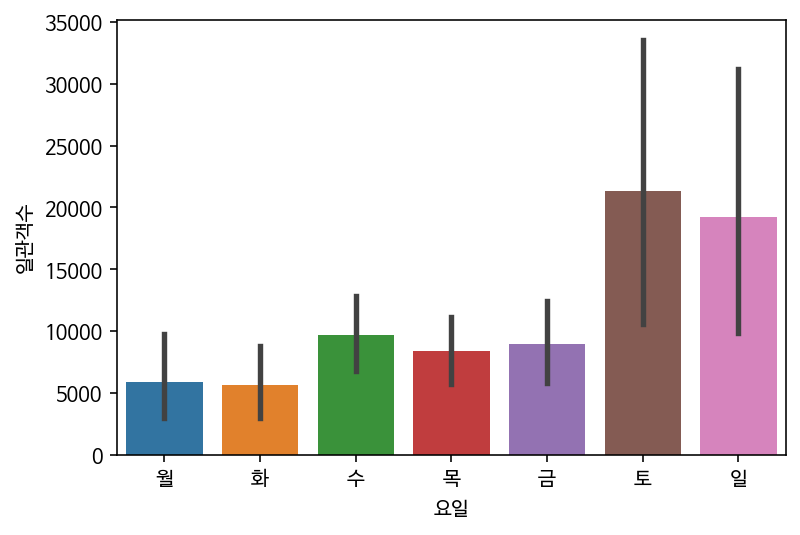

In [61]:
sns.barplot(x='요일', y='일관객수', data=df)
plt.xticks(range(7), labels=['월','화','수','목','금','토','일'])
plt.show()